In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [0]:
# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False)


# 농구선수 게임데이터를 이용해서 포지션 예측
# 2017 NBA 농구선수의 실제 데이터를 참고
# Player : 선수이름
#   Pos  : 포지션
#   3P   : 한경기 평균 3점슛 성공횟수
#   2P   : 한경기 평균 2점슛 성공횟수
#   TRB  : 한경기 평균 리바운드 성공횟수
#   AST  : 한경기 평균 어시스트 성공횟수
#   STL  : 한경기 평균 스틸 성공횟수
#   BLK  : 한경기 평균 블로킹 성공횟수
#    C   : 센터
#   SG   : 슈팅가드


# 센터와 슈팅가드를 구분짓는 특성feature
#   센터   : BLK, TRB, STL, AST, 2P
# 슈팅가드 :  3P,  2P, AST, STL


# 데이터 적재
bbplayer = pd.read_csv('bbplayer.csv')
bbplayer.info()
bbplayer.Pos.value_counts()


# 시각확
# 스틸/2점슛 산점도
sns.scatterplot('STL','2P', data=bbplayer, hue='Pos') #, markers=['o','x'])
plt.show()


# 어시스트/2점슛 산점도
sns.scatterplot('AST','2P', data=bbplayer, hue='Pos') #, markers=['o','x'])
plt.show()

# 센터/슈팅가드를 구분지을 명확한 경계가 안 보임


# 블로킹/3점슛 산점도
sns.scatterplot('BLK','3P', data=bbplayer, hue='Pos') #, markers=['o','x'])
plt.show()


# 리바운드/3점슛 산점도
sns.scatterplot('TRB','3P', data=bbplayer, hue='Pos') #, markers=['o','x'])
plt.show()


# 센터/슈팅가드를 구분지을 명확한 경계가 그나마 보임
# 따라서, 2점슌, 어시스트, 스틸 특성은 제외
bbplayer.drop(['2P','AST','STL'], axis=1, inplace=True)
bbplayer.info()


# 데이터 나누기
data = bbplayer.iloc[:, [2,3,4]]   # 선수명 제외
target = bbplayer.Pos
target = target.map({'C': 0, 'SG': 1})


# 데이터 분할
X_train, X_test, y_train, y_test = \
    train_test_split(data, target, random_state=1907111035)


# KNN 분석 및 평가
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print('훈련정확도', knn.score(X_train, y_train))

pred = knn.predict(X_test)
print('평가정확도', knn.score(X_test, y_test))
accuracy_score(y_test, pred)


# 최적의 K값을 찾기 위한 교차검증 실시
from sklearn.model_selection import cross_val_score

scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, 
                            X_train, y_train, 
                            cv=10, scoring = 'accuracy')
    scores.append(score.mean())
    

# 교차검증 결과 시각화
x = range(1, 11)
plt.plot(x, scores, 'ro-')

plt.show()

# k값에 따라 정확도가 점점 줄다가 어느 순간 줄어드는 비율이
# 작아지는 부분이 생기는데(변곡점) 그래프 상의 모양에서는
# 팔꿈치에 해당하는 부분이 최적의 K값을 의미함
# => 최적의 k 값 = 3


In [82]:
# KNN 알고리즘을 이용해서 당도, 바삭함을 
# 기준으로 과일인지 채소인지 구분
# => 당도가 6, 바삭함 4 인 토마토는 채소인가 과일인가?

# 데이터 적재
fresh = pd.read_csv('fresh.csv')
fresh.info()

fresh.head()
fresh.types.value_counts()


# 시각화
sns.countplot(fresh.types)
plt.show()

plt.plot(fresh.sweet, fresh.crunchy, 'ro')
plt.grid(True)
plt.show()


fresh['colors'] = fresh.types.map({'fruit': 'red', 
                                   'protein': 'green', 
                                   'vegetable': 'blue'})
fresh.plot('sweet', 'crunchy', 
           kind='scatter', c=fresh['colors'])
plt.grid(True)
plt.show()


sns.scatterplot(x='sweet', y='crunchy', hue='types', data=fresh)

for i, n in enumerate(fresh.name):
    plt.annotate(n, (fresh.sweet[i], fresh.crunchy[i]))
    # annotate(텍스트, x좌표, y좌표)
plt.show()


# 데이터 나누기
data = fresh.iloc[:, [0, 2]]
target = fresh.types.map({'fruit': 0, 'protein': 1, 'vegetable': 2})


# 적절한 K 찾기
scores = []

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, data, target, cv=5, scoring='accuracy')
    scores.append(score.mean())

plt.plot(range(1, 11), scores, 'ro-')
plt.show()

# 적절한 K값은 1,5,6,8 중 하나 => 1, 5로 설정
# => 높은 빈도의 높은 예측율을 가리키는 k를 선정



# KNN 분석
X_train, X_test, y_train, y_test = \
train_test_split(data, target, test_size=0.3, random_state=1907111400)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('훈련정확도', knn.score(X_train, y_train))

pred = knn.predict(X_test)
accuracy_score(y_test, pred)   # 1.0

pred = knn.predict(np.array([[6, 4]]))
# => 0 : 과일


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('훈련정확도', knn.score(X_train, y_train))

pred = knn.predict(X_test)
accuracy_score(y_test, pred)   # 1.0

pred = knn.predict(np.array([[6, 4]]))
# => 0 : 과일


훈련정확도 0.9


1.0

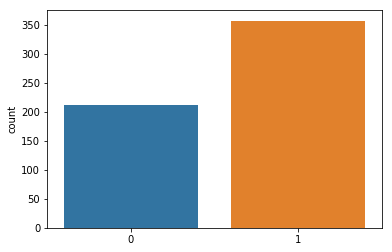

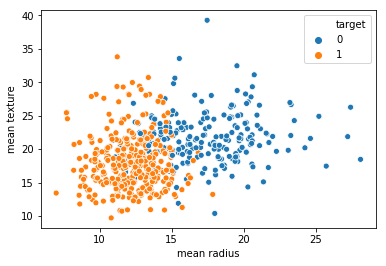

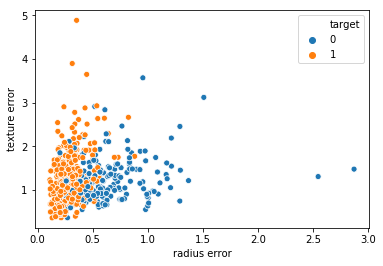

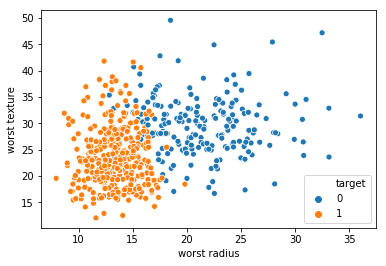

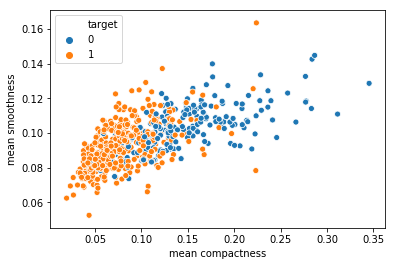

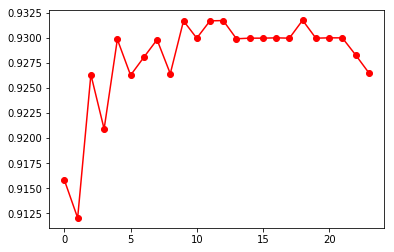

훈련정확도 0.9483568075117371
평가정확도 0.8811188811188811


In [114]:
# 유방암 데이터를 이용해서 음성/양성 진단
# 위스콘신 대학 유방암 진단 데이터
# 30 + 1 변수, 569개의 데이터로 구성

from sklearn.datasets import load_breast_cancer

# 데이터 적재
wbc = load_breast_cancer()

data = wbc.data
target = wbc.target

sns.countplot(target)
plt.show()


df = pd.DataFrame(wbc.data, columns=wbc.feature_names)
df['target'] = wbc.target


sns.scatterplot('mean radius', 'mean texture', 
                hue='target', data=df)
plt.show()

sns.scatterplot('radius error', 'texture error', 
                hue='target', data=df)
plt.show()

sns.scatterplot('worst radius', 'worst texture', 
                hue='target', data=df)
plt.show()

sns.scatterplot('mean compactness', 'mean smoothness', 
                hue='target', data=df)
plt.show()



# 데이터 분할
X_train, X_test, y_train, y_test = \
train_test_split(data, target, random_state=1907111435)


# 최적 K 찾기 위한 교차검증 실시
scores = []

for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, data, target, 
                            cv=10, scoring='accuracy')
    scores.append(score.mean())

plt.plot(scores, 'ro-')
plt.show()

# 최적의 k 값은 13으로 선택


# KNN 분석
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

print('훈련정확도', knn.score(X_train, y_train))

print('평가정확도', knn.score(X_test, y_test))

